In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
vacManu = pd.read_csv("./country_vaccinations_by_manufacturer.csv")
vac = pd.read_csv("./country_vaccinations.csv")

In [4]:
vacManu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28833 entries, 0 to 28832
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            28833 non-null  object
 1   date                28833 non-null  object
 2   vaccine             28833 non-null  object
 3   total_vaccinations  28833 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 901.2+ KB


In [5]:
sum(vacManu['location'] == 'China')
#the first dataset does not contain Chinese vaccination information.
sum(vac['country'] == 'China')

437

In [6]:
totalVac = vacManu.groupby(['location', 'date']).agg({'total_vaccinations':'sum'}).reset_index()
totalVac

,location,date,total_vaccinations
0,Austria,2021-01-08,31632
1,Austria,2021-01-15,117216
2,Austria,2021-01-22,215280
3,Austria,2021-01-29,264493
4,Austria,2021-02-05,362752
...,...,...,...
7950,Uruguay,2022-02-20,5662987
7951,Uruguay,2022-02-21,5668382
7952,Uruguay,2022-02-22,5671572
7953,Uruguay,2022-02-23,5681313


In [7]:
meanVac = totalVac.groupby('date').agg({'total_vaccinations':'mean'}).reset_index()
meanVac

,date,total_vaccinations
0,2020-12-04,1.000000e+00
1,2020-12-07,1.000000e+00
2,2020-12-09,2.000000e+00
3,2020-12-15,3.000000e+00
4,2020-12-16,4.000000e+00
...,...,...
434,2022-02-20,1.068526e+08
435,2022-02-21,1.060974e+08
436,2022-02-22,9.463981e+07
437,2022-02-23,1.506332e+08


<Axes: title={'center': 'Global Average Daily Vaccinations'}, xlabel='Day since 12/04/20'>

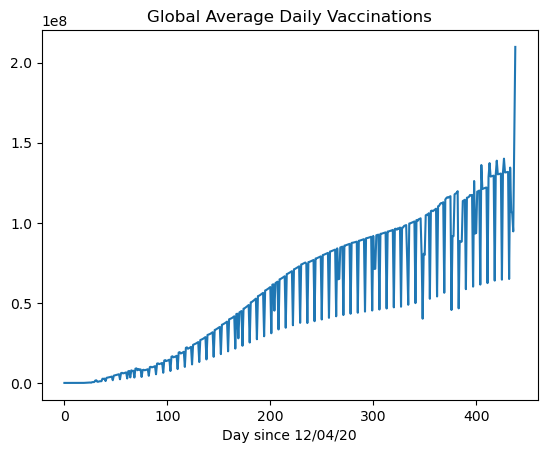

In [8]:
meanVac['total_vaccinations'].plot(title='Global Average Daily Vaccinations', xlabel = 'Day since 12/04/20')

In [9]:
manufacturers = vacManu.groupby(['location', 'vaccine']).agg({'total_vaccinations':'max'}).reset_index()
manufacturers

,location,vaccine,total_vaccinations
0,Austria,Johnson&Johnson,362353
1,Austria,Moderna,1578771
2,Austria,Oxford/AstraZeneca,1587250
3,Austria,Pfizer/BioNTech,14460894
4,Belgium,Johnson&Johnson,424680
...,...,...,...
160,United States,Moderna,207943834
161,United States,Pfizer/BioNTech,325012738
162,Uruguay,Oxford/AstraZeneca,89635
163,Uruguay,Pfizer/BioNTech,2354325


In [11]:
manu = manufacturers.groupby('vaccine').agg({'total_vaccinations':'max'}).reset_index()
manu
#globally, vaccines produced by Pfizer/BioNTech is the most popular one, the least with Novavax. 

,vaccine,total_vaccinations
0,CanSino,574208
1,Johnson&Johnson,18502638
2,Moderna,207943834
3,Novavax,52306
4,Oxford/AstraZeneca,67392849
5,Pfizer/BioNTech,592488693
6,Sinopharm/Beijing,19961665
7,Sinovac,25375908
8,Sputnik V,1845103


<Axes: title={'center': 'Manufacturers of Vaccines Produced'}, xlabel='vaccine'>

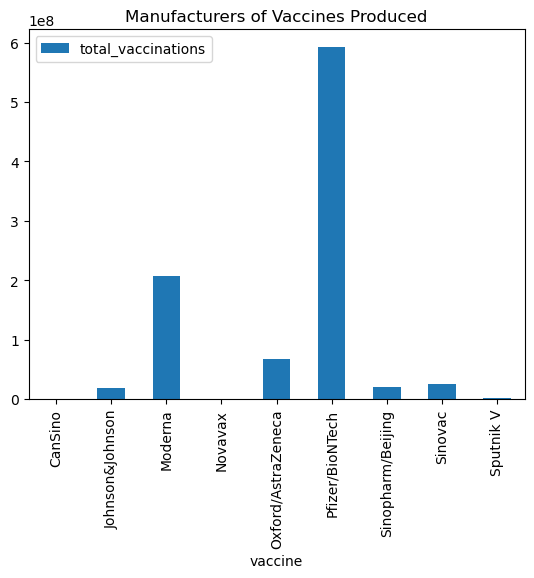

In [13]:
manu.plot(x="vaccine", kind='bar', title='Manufacturers of Vaccines Produced')

In [12]:
manufacturers.groupby('location').agg({'total_vaccinations':'max'}).reset_index()
#40 countries' total_vaccinations count

,location,total_vaccinations
0,Austria,14460894
1,Belgium,17233798
2,Bulgaria,2803039
3,Chile,25375908
4,Croatia,3892532
5,Cyprus,1171141
6,Czechia,14497139
7,Denmark,10235629
8,Ecuador,15812935
9,Estonia,1469209


In [13]:
vac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79486 entries, 0 to 79485
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              79486 non-null  object 
 1   iso_code                             79486 non-null  object 
 2   date                                 79486 non-null  object 
 3   total_vaccinations                   40805 non-null  float64
 4   people_vaccinated                    38664 non-null  float64
 5   people_fully_vaccinated              36210 non-null  float64
 6   daily_vaccinations_raw               33213 non-null  float64
 7   daily_vaccinations                   79173 non-null  float64
 8   total_vaccinations_per_hundred       40805 non-null  float64
 9   people_vaccinated_per_hundred        38664 non-null  float64
 10  people_fully_vaccinated_per_hundred  36210 non-null  float64
 11  daily_vaccinations_per_milli

In [14]:
china = vac[vac['country'] == 'China']
china.drop(columns=['source_name', 'source_website'], inplace=True)
china.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 14450 to 14886
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              437 non-null    object 
 1   iso_code                             437 non-null    object 
 2   date                                 437 non-null    object 
 3   total_vaccinations                   352 non-null    float64
 4   people_vaccinated                    12 non-null     float64
 5   people_fully_vaccinated              25 non-null     float64
 6   daily_vaccinations_raw               339 non-null    float64
 7   daily_vaccinations                   436 non-null    float64
 8   total_vaccinations_per_hundred       352 non-null    float64
 9   people_vaccinated_per_hundred        12 non-null     float64
 10  people_fully_vaccinated_per_hundred  25 non-null     float64
 11  daily_vaccinations_per_mil

/var/folders/tm/dj0qxgcn4j75czpgvwyxxztc0000gn/T/ipykernel_4704/4086855785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china.drop(columns=['source_name', 'source_website'], inplace=True)


<Axes: title={'center': 'Culmulative vaccinations in China since 12/15/2020'}>

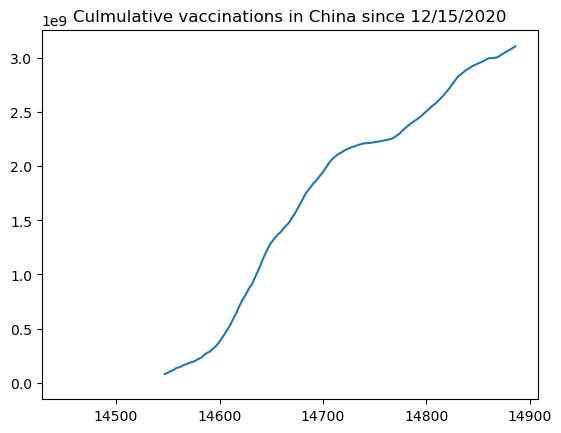

In [15]:
china['total_vaccinations'].plot(title="Culmulative vaccinations in China since 12/15/2020")

<Axes: title={'center': 'Daily vaccinations in China since 12/15/2020'}>

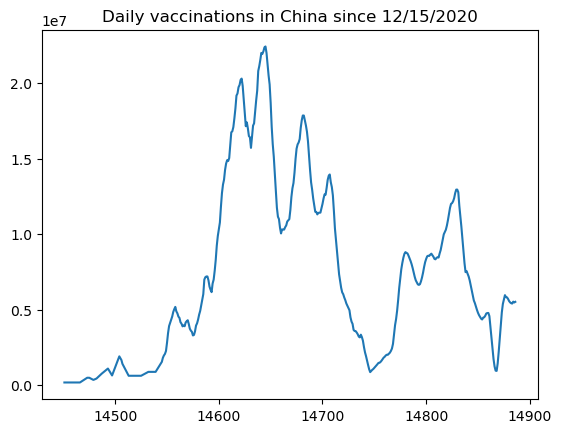

In [16]:
china['daily_vaccinations'].plot(title="Daily vaccinations in China since 12/15/2020")

In [17]:
[china['people_vaccinated'].max(), china['people_fully_vaccinated'].max()]

[1268180000.0, 1232543000.0]

In [18]:
china['vaccines'].nunique() 
# All Chinese vaccines were produced by the five specific manufacturers. China didn't use other vaccine products. 

1

In [19]:
china['vaccines'].value_counts()

CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001    437
Name: vaccines, dtype: int64

In [19]:
others = vac[vac['country'] != 'China']
others.drop(columns=['source_name', 'source_website'], inplace=True)
others.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79049 entries, 0 to 79485
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              79049 non-null  object 
 1   iso_code                             79049 non-null  object 
 2   date                                 79049 non-null  object 
 3   total_vaccinations                   40453 non-null  float64
 4   people_vaccinated                    38652 non-null  float64
 5   people_fully_vaccinated              36185 non-null  float64
 6   daily_vaccinations_raw               32874 non-null  float64
 7   daily_vaccinations                   78737 non-null  float64
 8   total_vaccinations_per_hundred       40453 non-null  float64
 9   people_vaccinated_per_hundred        38652 non-null  float64
 10  people_fully_vaccinated_per_hundred  36185 non-null  float64
 11  daily_vaccinations_per_milli

/var/folders/tm/dj0qxgcn4j75czpgvwyxxztc0000gn/T/ipykernel_3743/3746118416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others.drop(columns=['source_name', 'source_website'], inplace=True)


In [20]:
other_total_vac = others.groupby('country').agg({'total_vaccinations':'max'}).reset_index()
other_total_vac

,country,total_vaccinations
0,Afghanistan,5412309.0
1,Albania,2683715.0
2,Algeria,13461201.0
3,Andorra,141962.0
4,Angola,15902065.0
...,...,...
217,Wales,6859296.0
218,Wallis and Futuna,12287.0
219,Yemen,772574.0
220,Zambia,2799259.0


<Axes: title={'center': "Other countries' total vaccinations"}>

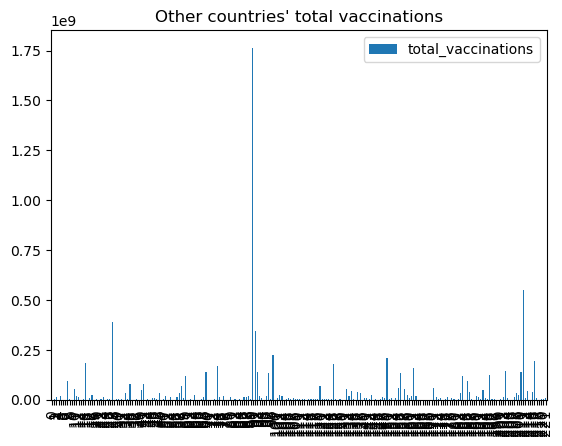

In [21]:
other_total_vac.plot(kind='bar', title="Other countries' total vaccinations")

In [22]:
other_total_vac['total_vaccinations'].max()
other_total_vac[other_total_vac['total_vaccinations'] == 1764970949.0]
# 其他国家中接种疫苗最多的是印度， 人口总量差不多，但接种人数远不及中国

,country,total_vaccinations
90,India,1.764971e+09


In [23]:
other_daily = others.groupby('date').agg({'daily_vaccinations':'mean'}).reset_index()
other_daily

,date,daily_vaccinations
0,2020-12-02,NaN
1,2020-12-03,0.000000
2,2020-12-04,0.000000
3,2020-12-05,0.000000
4,2020-12-06,0.000000
...,...,...
445,2022-02-20,135915.304000
446,2022-02-21,150505.772727
447,2022-02-22,164239.617978
448,2022-02-23,141547.012821


<Axes: title={'center': 'Wolrd Average Daily Vaccinations Since 12/02/2020'}>

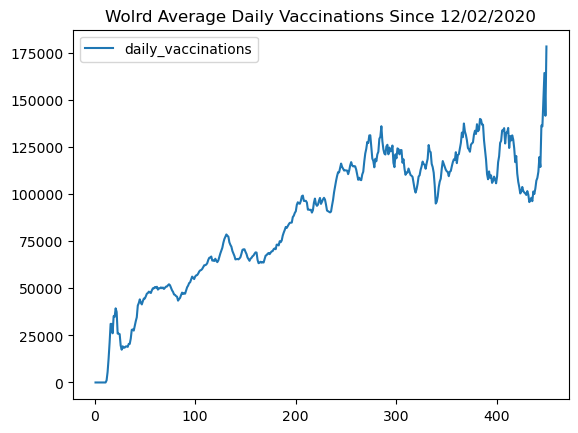

In [24]:
other_daily.plot(title="Wolrd Average Daily Vaccinations Since 12/02/2020")

In [25]:
[others['people_vaccinated'].mean(), others['people_fully_vaccinated'].mean()]

[15860952.63399048, 11835456.663147714]

In [27]:
all = []
for item in others['vaccines']:
    item = item.split(',')
    for i in item:
        i = i.strip(' ')
        if i not in all:
            all.append(i)
all

['Johnson&Johnson',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinovac',
 'Sputnik V',
 'Moderna',
 'CanSino',
 'Covaxin',
 'Abdala',
 'Soberana02',
 'Novavax',
 'COVIran Barekat',
 'FAKHRAVAC',
 'Razi Cov Pars',
 'SpikoGen',
 'QazVac',
 'Sputnik Light',
 'EpiVacCorona',
 'Medigen',
 'Turkovac',
 'ZF2001',
 'Sinopharm/Wuhan']

In [28]:
len(all)
# The world in total uses 23 types of vaccines.

23